<a href="https://colab.research.google.com/github/Pratikmehta1729/walkover/blob/master/word2vecCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training  websites

# **K means clustering through google trained model**

In [0]:
!pip3 install inscriptis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np 
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
from sklearn.manifold import TSNE
from gensim.models import Word2Vec,KeyedVectors
from sklearn import cluster,metrics
import pickle
from sklearn.neighbors import NearestNeighbors
import textwrap 
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
import nltk
import gensim.downloader as api

##importing google pretrained vectors

In [0]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-04-24 06:21:25--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.113.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.113.37|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



##Loading google model


In [0]:

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' 
modelg= KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
#modelg = Word2Vec(sentences, min_count=1,size=200)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


##Importing CSV File

In [0]:

#url = 'https://raw.githubusercontent.com/Nitss10/Walkover/master/top_10.csv'
#url='https://raw.githubusercontent.com/Nitss10/Walkover/master/final_top_100.csv'
#url='https://raw.githubusercontent.com/Nitss10/Walkover/master/eng_final_top_100.csv'
#url='https://raw.githubusercontent.com/Pratikmehta1729/walkover/master/eng_sites_dataset.csv'
url='https://raw.githubusercontent.com/Pratikmehta1729/walkover/master/eng_sites_dataset_2.0_shuffled.csv'

df = pd.read_csv(url)

l=[]
titles=[]
y=df.title.tolist()
x=df.text.tolist()

title_map={}
count=0
for title in y:
  title_map[title]=count
  titles.append(title)
  count+=1
  
for item in x:
    l.append(item.split())


##Vectorization of all url's

In [0]:
sentences = l
def sent_vectorizer(sent, modelg):
    
    sent_vec =[]
    numw = 0
    for w in sent:
        
        try:
            if numw == 0:
                sent_vec = modelg[w]
            else:
                sent_vec = np.add(sent_vec, modelg[w])
            numw+=1
        except:
            pass
    return np.asarray(sent_vec) / numw
    
  
X=[]

for sentence in sentences:
    X.append(sent_vectorizer(sentence, modelg)) 



##Elbow Method

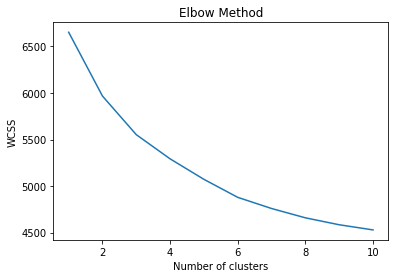

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##Clustring of the vectors

##K means & Plotting clustered vectors

Cluster id labels for inputted data
11154
36 ['https://fomo.com', 'https://mobilefuse.com', 'https://www.getsocial.im/', 'https://pinsightmedia.com/solutions/onelouder', 'https://www.sajari.com/', 'https://adport.io', 'https://www.picreel.com/', 'https://crisp.chat/en/', 'https://fireside.fm', 'https://affiliates.fiverr.com', 'https://hockeyapp.net/blog/', 'https://www.verticalresponse.com/', 'https://fmb.la', 'https://getpocket.com:443/publisher/', 'https://www.livehelpnow.net/', 'https://www.foxpush.com', 'https://affise.com', 'https://helphero.co', 'https://rapidapi.com', 'https://mindspark.com', 'https://push.house', 'https://simplecast.com', 'https://assets.clickfunnels.com', 'https://www.optimonk.com/', 'https://akamaitests.azureedge.net', 'https://www.ipburger.com', 'https://www.smore.com/', 'https://lastspam.com', 'https://www.southwest.com/html/errors/javascript_disabled.html', 'https://zoomsupport.com', 'https://tapfiliate.com', 'https://browser.yandex.com', 'https://www.shop

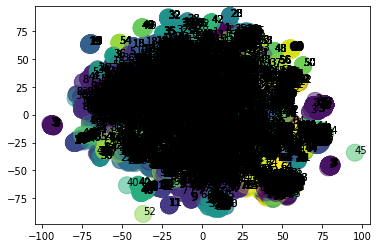

In [0]:
NUM_CLUSTERS=65
kmeans = cluster.KMeans(NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (len(labels))

#print ("Centroids data")
#print (centroids)
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
#print (silhouette_score)

graph= TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=graph.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=labels, s=290,alpha=.5)
 
final_dict={}
for j in range(len(sentences)):    
   plt.annotate(labels[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
  
   if labels[j] not in final_dict:
     final_dict[labels[j]]=[]
   final_dict[labels[j]].append(titles[j])
for key in final_dict.keys():
  print(key,final_dict[key])

plt.show()

In [0]:
#stores the created cluster to the specified filename 
#(default filename - clustered_sites_50_google.csv)
def store_cluster(filename='sites_50_google.cluster'):
  with open(filename, 'wb') as cluster_file:
    pickle.dump(final_dict, cluster_file)
 
store_cluster()

In [0]:
def read_cluster(filename=''):
  with open('sites_50_google.cluster', 'rb') as cluster_file:
    cluster = pickle.load(cluster_file)
    return cluster
read_cluster()

In [0]:
def write_kmeans():
  with open('kmeans_file', 'wb') as kmeans_file:
    pickle.dump(kmeans, kmeans_file)

write_kmeans()
load_kmeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=65, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## getting data for new url

In [0]:
ERROR_MSG = "UNABLE TO CATEGORISE URL"
MIN_REQ = 10
#frequent insignificant words
AVOID = ['browser', 'javascript', 'failed', 'load', 'contact', 'contacts', 'older', 'home', 'more', 'version', 'main', 'menu', 'sign', 'log', 'account', 'content', 'navigate', 'blocked', 'supported', 'support', 'unsupported',  'enable', 'disable', 'register', 'navigation', 'skip', 'jump', 'section', 'policy', 'site', 'uses', 'cookies', 'cookie' 'upgrade', 'anymore',  'required', 'enabled', 'disabled', 'copyright', 'rights', 'copyrights', 'terms',  'conditions', 'privacy', 'policies', 'best']

In [0]:
import ssl
from urllib.request import Request, urlopen
from inscriptis import get_text
import html2text

def get_text_content(url):
  """ return all text content from url """

  req = Request(url, headers={'User-Agent': 'Mozilla/75.0'})
  uvcontext = ssl._create_unverified_context()
  webpage = urlopen(req,context=uvcontext).read().decode('utf-8')
  return get_text(webpage)

In [0]:
get_text_content('https://www.instagram.com/')

''

In [0]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
import nltk
nltk.download('wordnet')
nltk.download('words')
english_words = set(words.words())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [0]:
def lemmatize(text):
    return (WordNetLemmatizer().lemmatize(text))

def is_english(text):
  """ Need to upgrade for checking valid words """

  return text in english_words
  

def preprocess(content):
  """  1) tokenization
       2) remove stopwords or word with non-alphabetic character or word with length less than 3
       3) converte in lowercase 
       4) lemmatization 
       5) remove frequent insignificant words """

  content = simple_preprocess(content, deacc=True, min_len=4, max_len=45)
  content = [lemmatize(token) for token in content if token not in STOPWORDS and token not in AVOID]
  content = list(filter(lambda word: is_english(word), content))
  if len(content) >= MIN_REQ: return content
  else: raise


## Main function for new URL

In [0]:
def keyWordsOfCluster(clusterNo):
  neigh = NearestNeighbors(2, 0.4)
  neigh.fit(X)
  index = neigh.kneighbors([centroids[clusterNo]], 5, return_distance=False)
  return index

#keyWordsOfCluster(1)     

##Function to get keywords of any cluster

In [0]:
def give_cluster():
  url = input("Enter Url:")
  try:
      print('URL name is :',url)
      for key in final_dict.keys():
        for value in final_dict[key]:
          if(url==value):
            return key
      
      content = preprocess(get_text_content(url))
      new_url_vector=sent_vectorizer(content,modelg)
      #print(new_url_vector)
      print(kmeans.predict([new_url_vector])[0])
      return kmeans.predict([new_url_vector])[0]
      #print(get_category(content))
  except Exception as e:
      return e
      # print('ERROR_MSG',e)
try:
  ClusterNo = give_cluster()
  print("ClusterNo",ClusterNo)
  index = keyWordsOfCluster(ClusterNo)
  thisset=set([])
  for i in range(len(index[0])):
    for j in range(len(l[index[0][i]])):
      thisset.add(l[index[0][i]][j])
  print(thisset)
except Exception as e:
      print('ERROR_MSG',e)  

Enter Url:https://www.google.com
URL name is : https://www.google.com
ClusterNo name 'final_dict' is not defined
ERROR_MSG name 'NearestNeighbors' is not defined


#Project Ended

In [0]:
# %config NotebookApp.iopub_data_rate_limit=10000000000
%config 
#  set NotebookApp.iopub_data_rate_limit=10000000000
# print(l)

Available objects for config:
     Shell
     HistoryManager
     PrefilterManager
     IPCompleter
     DisplayFormatter
     MagicsManager
     ScriptMagics
     AliasManager
     IPKernelApp
     InlineBackend
     StoreMagics
     StoreMagics
